In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [2]:
tr_d = pd.read_csv('/home/antirrabia/Documents/DeepLearnin/DATASETS/HousePrices/train.csv')
te_d = pd.read_csv('/home/antirrabia/Documents/DeepLearnin/DATASETS/HousePrices/test.csv')

In [3]:
tr_d.shape, te_d.shape

((1460, 81), (1459, 80))

### Getting the columns that have nan

In [4]:
# Training and Test missing values
tr_m = set(tr_d.columns[tr_d.isna().sum()>0])
te_m = set(te_d.columns[ te_d.isna().sum()>0])

In [5]:
# findin column that are just in training set
tr_m - te_m

{'Electrical'}

In [6]:
# Finding columns that are just in test set
te_m - tr_m

{'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'Exterior1st',
 'Exterior2nd',
 'Functional',
 'GarageArea',
 'GarageCars',
 'KitchenQual',
 'MSZoning',
 'SaleType',
 'TotalBsmtSF',
 'Utilities'}

In [7]:
# Finding the common columns
tr_m.intersection(te_m)

{'Alley',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'Fence',
 'FireplaceQu',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'PoolQC'}

In [8]:
# Counting the nan's in each column
# and see the colums that have a big ratio
common_m = ['Alley','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2', 'BsmtQual','Fence',
            'FireplaceQu','GarageCond','GarageFinish', 'GarageQual', 'GarageType','GarageYrBlt',
            'LotFrontage','MasVnrArea', 'MasVnrType', 'MiscFeature','PoolQC']

tr_d[common_m].isna().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageQual        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrArea         8
MasVnrType         8
dtype: int64

In [9]:
# Test missing values
te_d[common_m].isna().sum().sort_values(ascending=False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
dtype: int64

In [10]:
# PoolQC      nan 99% = no pool 
# MiscFeature nan 96% = no misc feature
# Alley       nan 93% = no alley access
# Fence       nan 80% = no Fence
# FireplaceQu nan 47% = no FirePlace
# GarageType  nan  6% = no garage
# GarageFinish nan 6% = no garage
# GarageQual  nan  6% = no garage
# GarageCond  nan  6% = no garage
# BsmtFinType2 nan 3% = no basement
# BsmtFinType1 nan 3% = no basement
# BsmtCond    nan  3% = no basement
# BsmtQual    nan  3% = no basement
# BsmtExposure nan 3% = no basement (This already has a category 'NO')
# MasVnrType hast category = none(864 most common)


# GarageYrBlt nan = fill with 0

# Electrical hast category = SBrkr(1334 most common)
# 

# Numerical
# LotFrontage nan 17% = 
# MasVnrArea  nan  1% = 

with_none = ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Fence', 'FireplaceQu', 
           'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'MasVnrType', 'MiscFeature', 'PoolQC']

In [11]:
# Imputing
tr_d[with_none] = tr_d[with_none].fillna('None')
te_d[with_none] = te_d[with_none].fillna('None')

In [12]:
# Updating Common columns
set(common_m) - set(with_none)

{'GarageYrBlt', 'LotFrontage', 'MasVnrArea'}

In [13]:
common_m = ['GarageYrBlt', 'LotFrontage', 'MasVnrArea']
common_m

['GarageYrBlt', 'LotFrontage', 'MasVnrArea']

In [14]:
# Imputing with the median from each Neighborhood
tr_d['LotFrontage'] = ( tr_d.groupby('Neighborhood')['LotFrontage']
                       .transform( lambda x: x.fillna( x.median() )) )

te_d['LotFrontage'] = ( te_d.groupby('Neighborhood')['LotFrontage']
                       .transform( lambda x: x.fillna( x.median() )) )

In [15]:
# Imputing with the median from each Neighborhood
tr_d['GarageYrBlt'] = ( tr_d.groupby('Neighborhood')['GarageYrBlt']
                       .transform( lambda x: x.fillna( x.median() )) )

te_d['GarageYrBlt'] = ( te_d.groupby('Neighborhood')['GarageYrBlt']
                       .transform( lambda x: x.fillna( x.median() )) )

In [16]:
# Updating missing values
tr_m = set( tr_d.columns[ tr_d.isna().sum() > 0 ] )
te_m = set( te_d.columns[ te_d.isna().sum() > 0 ] )

tr_m.intersection(te_m)

{'MasVnrArea'}

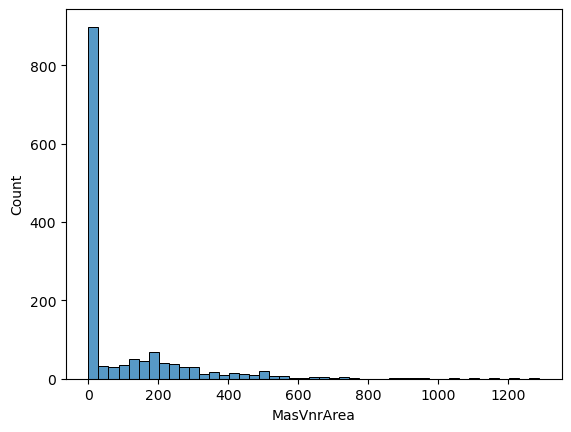

In [17]:
sns.histplot(data=te_d, x='MasVnrArea');

In [18]:
# filling nan with Zero beacuse it is the big category
tr_d['MasVnrArea'] = tr_d['MasVnrArea'].fillna(0)
te_d['MasVnrArea'] = tr_d['MasVnrArea'].fillna(0)

In [19]:
# Updating missing values
tr_m = set( tr_d.columns[ tr_d.isna().sum() > 0])
te_m = set( te_d.columns[ te_d.isna().sum() > 0])

tr_m.intersection(te_m)

set()

In [20]:
# Looking columns with missing value in Training Set
tr_m

{'Electrical'}

In [21]:
tr_d['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [22]:
tr_d['Electrical'].isna().sum()

1

In [23]:
tr_d.groupby('Neighborhood')['Electrical'].describe()

,count,unique,top,freq
Neighborhood,,,,
Blmngtn,17,1,SBrkr,17
Blueste,2,1,SBrkr,2
BrDale,16,1,SBrkr,16
BrkSide,58,3,SBrkr,42
ClearCr,28,3,SBrkr,25
CollgCr,150,1,SBrkr,150
Crawfor,51,3,SBrkr,46
Edwards,100,4,SBrkr,78
Gilbert,79,1,SBrkr,79


In [24]:
pd.set_option('display.max_columns', None)
tr_d[ tr_d['Electrical'].isna() ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,None,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,167500


In [25]:
# filling nan from the Electrical with 'SBrkr' 
# wich is the standar for its Neighborhood

tr_d['Electrical'] = tr_d['Electrical'].fillna('SBrkr')

In [26]:
tr_m = set( tr_d.columns[ tr_d.isna().sum() > 0 ])
te_m = set( te_d.columns[ te_d.isna().sum() > 0 ] )

tr_m

set()

In [27]:
te_m

{'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'Exterior1st',
 'Exterior2nd',
 'Functional',
 'GarageArea',
 'GarageCars',
 'KitchenQual',
 'MSZoning',
 'SaleType',
 'TotalBsmtSF',
 'Utilities'}

In [28]:
te_d[list(te_m)].isna().sum().sort_values(ascending=False)

MSZoning        4
Utilities       2
Functional      2
BsmtHalfBath    2
BsmtFullBath    2
GarageArea      1
SaleType        1
BsmtFinSF1      1
GarageCars      1
Exterior2nd     1
Exterior1st     1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
KitchenQual     1
dtype: int64

In [29]:
# pd.set_option('display.max_rows', None)
# BsmtFullBath=0, BsmtHalfBath=0, BsmtFinSF2=0 squaredFeet, TotalBsmtSF=0 SquaredFeet, 
# BsmtUnfSF=0 SquaredFeet, BsmtFinSF1=0 SquaredFeet

te_d[ te_d['BsmtFullBath' ].isna() | te_d['BsmtHalfBath'].isna() | te_d['BsmtFinSF2'].isna() |
      te_d['TotalBsmtSF' ].isna() | te_d['BsmtUnfSF'].isna() | te_d['BsmtFinSF1'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,None,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,233.0,TA,TA,PConc,None,None,None,None,NaN,None,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,None,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,None,MnPrv,None,0,4,2008,ConLD,Abnorml
728,2189,20,RL,123.0,47007,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,95.0,TA,TA,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,None,None,None,0,7,2008,WD,Normal


In [36]:
with_0 = [ 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF2', 
           'TotalBsmtSF',  'BsmtUnfSF', 'BsmtFinSF1']

In [37]:
# Fill with 0(Zero) beacuse they have no Basement
te_d[with_0] = te_d[with_0].fillna(0)

In [38]:
te_m = set( te_d.columns[ te_d.isna().sum() > 0] )
te_m

{'Exterior1st',
 'Exterior2nd',
 'Functional',
 'GarageArea',
 'GarageCars',
 'KitchenQual',
 'MSZoning',
 'SaleType',
 'Utilities'}

In [42]:
# pd.set_option('display.max_rows', None)
te_d[list(te_m)].isna().sum().sort_values(ascending=False)

MSZoning       4
Utilities      2
Functional     2
GarageArea     1
SaleType       1
GarageCars     1
Exterior2nd    1
Exterior1st    1
KitchenQual    1
dtype: int64

In [52]:
te_d[ te_d['Exterior1st'].isna() | te_d['Exterior2nd'].isna() ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
691,2152,30,RL,85.0,19550,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,1170.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,None,1959.0,None,0.0,0.0,None,None,Y,0,39,0,0,0,0,None,None,None,0,1,2008,WD,Normal


In [53]:
te_d[ te_d['KitchenQual'].isna() ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,1556,50,RL,72.0,10632,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,68.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,None,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,None,None,None,0,1,2010,COD,Normal


In [48]:
te_d[ te_d['GarageArea'].isna() | te_d['GarageCars'].isna() ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1116,2577,70,RM,50.0,9060,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,None,Detchd,1950.0,None,NaN,NaN,None,None,Y,174,0,212,0,0,0,None,MnPrv,None,0,3,2007,WD,Alloca


In [49]:
te_d[ te_d['SaleType'].isna() ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1029,2490,20,RL,85.0,13770,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1958,1998,Gable,CompShg,Plywood,Plywood,BrkFace,281.0,TA,TA,CBlock,TA,TA,Mn,Rec,190.0,BLQ,873.0,95.0,1158.0,GasA,TA,Y,SBrkr,1176,0,0,1176,1.0,0.0,1,0,3,1,TA,6,Typ,2,Gd,Attchd,1958.0,Unf,1.0,303.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,10,2007,NaN,Normal


In [45]:
te_d[ te_d['Functional'].isna() ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
756,2217,20,NaN,80.0,14584,Pave,None,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,None,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,None,None,None,0,2,2008,WD,Abnorml
1013,2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,771.0,771.0,GasA,Fa,Y,SBrkr,866,504,114,1484,0.0,0.0,2,0,3,1,TA,6,NaN,0,None,Detchd,1910.0,Unf,1.0,264.0,TA,Fa,N,14,211,0,0,84,0,None,None,None,0,9,2007,COD,Abnorml


In [44]:
te_d[ te_d['Utilities'].isna() ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,None,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,320.0,Fa,Fa,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,None,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,None,None,None,0,3,2009,ConLD,Normal
485,1946,20,RL,63.0,31220,Pave,None,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,None,None,Shed,750,5,2008,WD,Normal


In [43]:
te_d[ te_d['MSZoning'].isna() ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,None,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,320.0,Fa,Fa,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,None,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,None,None,None,0,3,2009,ConLD,Normal
756,2217,20,NaN,80.0,14584,Pave,None,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,None,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,None,None,None,0,2,2008,WD,Abnorml
790,2251,70,NaN,60.0,56600,Pave,None,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,11.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,None,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,None,None,None,0,1,2008,WD,Normal
1444,2905,20,NaN,125.0,31250,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,106.0,TA,Fa,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,None,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,None,None,None,0,5,2006,WD,Normal


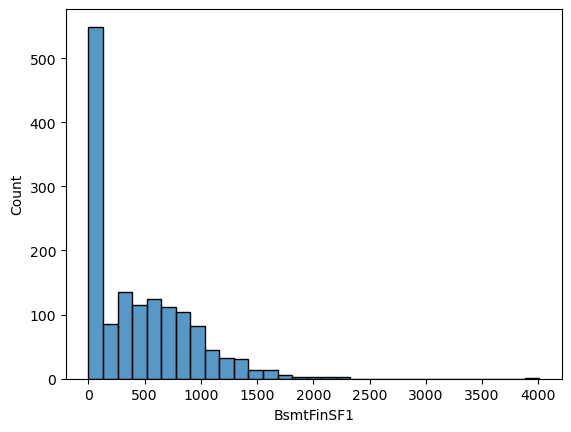

In [41]:
sns.histplot(te_d, x='BsmtFinSF1');

In [43]:
# number of nan in 'BsmtFinSF1'
te_d['BsmtFinSF1'].isna().sum()

1

In [45]:
# showing caracteristic of the record that has nan
te_d[ te_d['BsmtFinSF1'].isna() ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,None,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,233.0,TA,TA,PConc,None,None,None,None,NaN,None,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,None,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,None,MnPrv,None,0,4,2008,ConLD,Abnorml


<Axes: xlabel='BsmtFinSF1', ylabel='Count'>

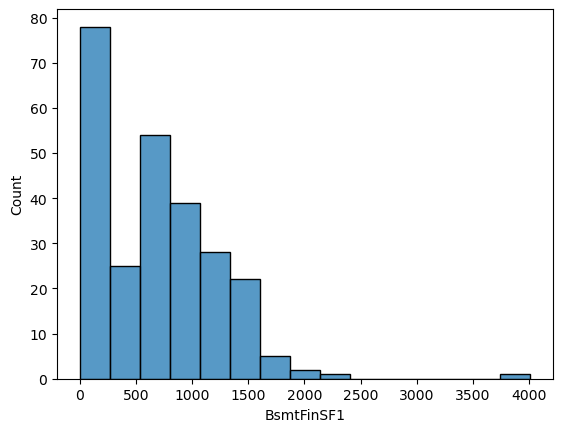

In [60]:
# seeing the distribution that has most important features 
# that can come together in 'BsmtFinSF1'
sns.histplot(te_d[ (te_d['HouseStyle'] == '1Story') & ( te_d['Street'] == 'Pave') & ( te_d['LotShape'] == 'IR1') ],x='BsmtFinSF1');

In [59]:
# Getting the mean of those features with respect 'BsmtFinSF1'
te_d[ (te_d['HouseStyle'] == '1Story') & ( te_d['Street'] == 'Pave') & ( te_d['LotShape'] == 'IR1') ]['BsmtFinSF1'].describe()

count     255.000000
mean      677.552941
std       556.135849
min         0.000000
25%       174.500000
50%       660.000000
75%      1030.500000
max      4010.000000
Name: BsmtFinSF1, dtype: float64

In [61]:
# Filling the nan with the mean of the above
te_d['BsmtFinSF1'] = te_d['BsmtFinSF1'].fillna(677.552941)

In [62]:
te_d['BsmtFinSF1'].isna().sum()

0

In [64]:
te_d['BsmtFinSF2'].isna().sum()

1

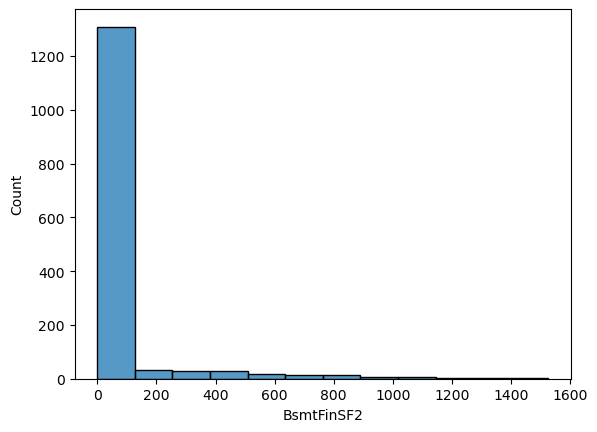

In [63]:
sns.histplot(te_d, x='BsmtFinSF2');

In [65]:
te_d[ te_d['BsmtFinSF2'].isna() ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,None,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,233.0,TA,TA,PConc,None,None,None,None,677.552941,None,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,None,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,None,MnPrv,None,0,4,2008,ConLD,Abnorml


In [ ]:
te_d.

In [44]:
te_d.groupby('Neighborhood')['BsmtFinSF1'].describe()

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
Blmngtn,11.0,531.090909,530.115356,0.0,16.00,453.0,1066.00,1087.0
Blueste,8.0,320.875000,277.160313,0.0,57.00,348.0,497.50,747.0
BrDale,14.0,268.928571,153.061307,0.0,180.50,291.0,374.00,483.0
BrkSide,49.0,206.367347,215.909963,0.0,0.00,175.0,306.00,910.0
ClearCr,16.0,521.125000,380.850780,0.0,222.50,498.0,820.75,1092.0
CollgCr,117.0,531.846154,500.610965,0.0,0.00,527.0,870.00,2085.0
Crawfor,52.0,475.365385,496.380508,0.0,0.00,377.0,736.00,1573.0
Edwards,94.0,394.531915,530.477198,0.0,0.00,285.5,603.50,4010.0
Gilbert,86.0,271.604651,338.471661,0.0,0.00,0.0,568.00,1047.0


In [14]:
print(tr_d.groupby('Neighborhood')['LotFrontage'].describe())

              count       mean        std   min    25%   50%     75%    max
Neighborhood                                                               
Blmngtn        14.0  47.142857   4.990100  43.0  43.00  43.0   53.00   53.0
Blueste         2.0  24.000000   0.000000  24.0  24.00  24.0   24.00   24.0
BrDale         16.0  21.562500   1.209339  21.0  21.00  21.0   21.00   24.0
BrkSide        51.0  57.509804  15.528519  50.0  50.00  52.0   60.00  144.0
ClearCr        13.0  83.461538  18.875096  62.0  75.00  80.0   83.00  138.0
CollgCr       126.0  71.682540  16.359291  36.0  64.00  70.0   78.00  122.0
Crawfor        41.0  71.804878  19.436074  40.0  55.00  74.0   82.00  130.0
Edwards        92.0  68.217391  32.431780  24.0  58.75  65.5   74.25  313.0
Gilbert        49.0  79.877551  32.748176  42.0  60.00  65.0   93.00  182.0
IDOTRR         34.0  62.500000  18.282712  40.0  50.00  60.0   64.50  120.0
MeadowV        15.0  27.800000  10.107988  21.0  21.00  21.0   38.50   44.0
Mitchel     

In [26]:
te_d['MasVnrArea'].isna().sum()

15

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# tr_d[tr_d['GarageYrBlt'].isna()]
tr_d[ tr_d['MasVnrArea'] == 0]#.value_counts()

In [22]:
tr_d['GarageYrBlt'].isna().sum()

81

In [27]:
tr_d.groupby('Neighborhood')['GarageYrBlt'].describe()

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
Blmngtn,17.0,2005.294118,1.311712,2003.0,2005.00,2005.0,2006.00,2007.0
Blueste,2.0,1980.000000,0.000000,1980.0,1980.00,1980.0,1980.00,1980.0
BrDale,15.0,1973.933333,6.238895,1970.0,1971.00,1972.0,1973.00,1991.0
BrkSide,48.0,1950.291667,26.456675,1916.0,1928.75,1940.0,1970.50,2003.0
ClearCr,27.0,1968.518519,19.686720,1908.0,1957.50,1968.0,1982.50,1997.0
CollgCr,148.0,1998.689189,9.358943,1969.0,1998.00,2002.0,2004.00,2009.0
Crawfor,51.0,1951.647059,26.371063,1914.0,1931.50,1942.0,1972.00,2008.0
Edwards,78.0,1967.782051,24.359668,1920.0,1951.25,1957.5,1996.00,2009.0
Gilbert,79.0,1998.683544,9.102753,1951.0,1996.50,2000.0,2004.00,2007.0
